In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import mlab
from scipy import signal
import h5py, time
import sys
import glob
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile
from discharge_tools import *
from iminuit import Minuit, describe
from pprint import pprint # we use this to pretty print some stuff later
from tqdm import tqdm

plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [2]:
foldername = r'/data/new_trap/20200320/Bead1/Discharge/'

resp_z = discharge_response(foldername=foldername,str_axis='z',drive_freq=71)
resp_x = discharge_response(foldername=foldername,str_axis='x',drive_freq=71)
resp_y = discharge_response(foldername=foldername,str_axis='y',drive_freq=71)

290  files in folder
290  files loaded


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


290  files in folder
290  files loaded
290  files in folder
290  files loaded


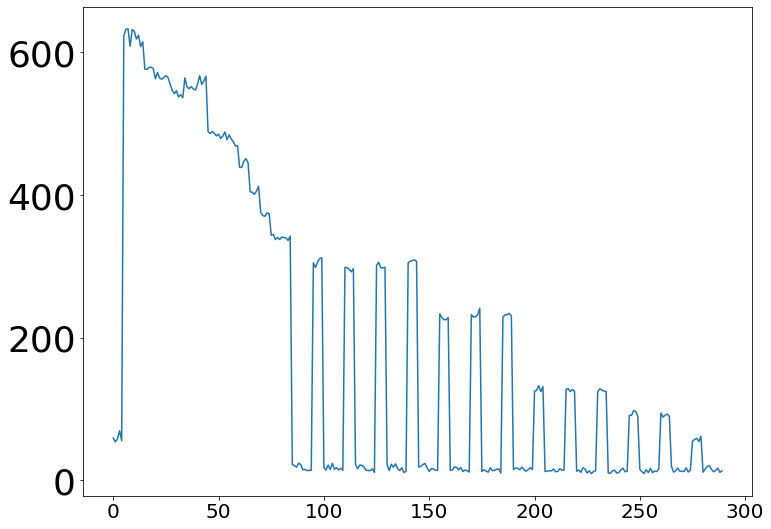

In [9]:
plt.plot(resp_z)

In [10]:
bin_cont_z, bin_cont_x, bin_cont_y = [ [] for x in range(3)]
bin_unc_z, bin_unc_x, bin_unc_y = [ [] for x in range(3)]
for i in np.arange(0,len(resp_z),5):
    bin_cont_z.append(np.mean(resp_z[i:i+5]))
    bin_unc_z.append(np.std(resp_z[i:i+5]))
    bin_cont_x.append(np.mean(resp_x[i:i+5]))
    bin_unc_x.append(np.std(resp_x[i:i+5]))
    bin_cont_y.append(np.mean(resp_y[i:i+5]))
    bin_unc_y.append(np.std(resp_y[i:i+5]))
    

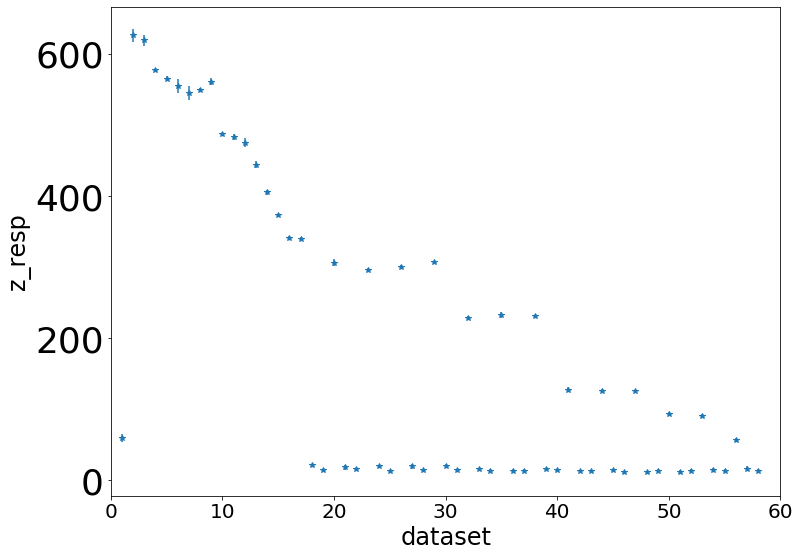

In [56]:
x = np.arange(1,(len(bin_cont_z)+1),1)
#plt.errorbar(x,np.divide(bin_cont_z,45),np.divide(bin_unc_z,45),linestyle="",marker="*")
plt.errorbar(x,bin_cont_z,bin_unc_z,linestyle="",marker="*")
#plt.errorbar(x,bin_cont_x,bin_unc_x,linestyle="",marker="*")
#plt.errorbar(x,bin_cont_y,bin_unc_y,linestyle="",marker="*")

#for i in np.arange(1,20,1):
#    plt.axhline(i,alpha=0.5, linestyle="dashed")
#plt.ylim(0,20)
plt.ylabel("z_resp")
plt.xlabel("dataset")
plt.xlim(0,60)
plt.savefig("Temporary_Plots/Discharge_Z_Wilson.png",dpi=300,bbox_inches="tight")
#plt.grid("True")

In [12]:
diff_list = []
for i in np.arange(0,len(bin_cont_z)-1,1):
    diff_list.append(bin_cont_z[i]-bin_cont_z[i+1])

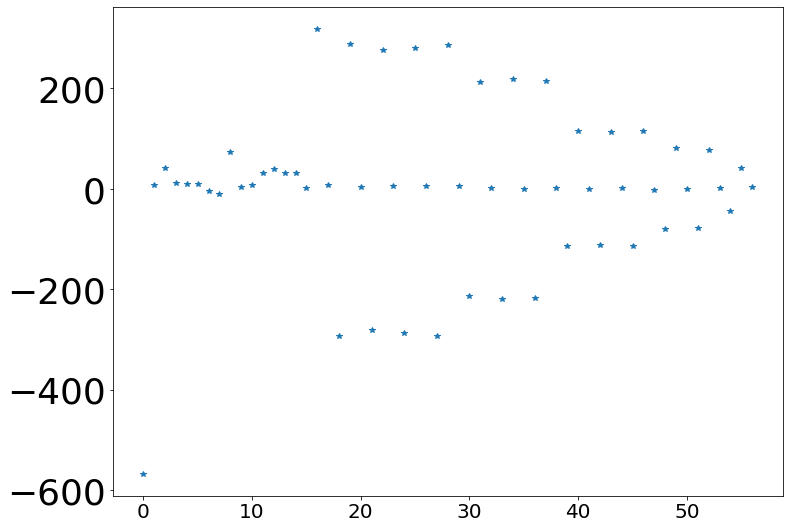

In [13]:
plt.plot(diff_list, linestyle="",marker="*")
#plt.ylim(-100,100)
#plt.xlim(20,60)
#plt.ylim(-42,45)
#plt.xlim(100,55)

In [14]:
foldername = r'/data/new_trap/20200316/Bead1/Discharge/'

resp_z2 = discharge_response(foldername=foldername,str_axis='z',drive_freq=71,max_file=1000)
resp_x2 = discharge_response(foldername=foldername,str_axis='x',drive_freq=71,max_file=1000)
resp_y2 = discharge_response(foldername=foldername,str_axis='y',drive_freq=71,max_file=1000)

705  files in folder
705  files loaded


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


705  files in folder
705  files loaded
705  files in folder
705  files loaded


(500, 739.2)

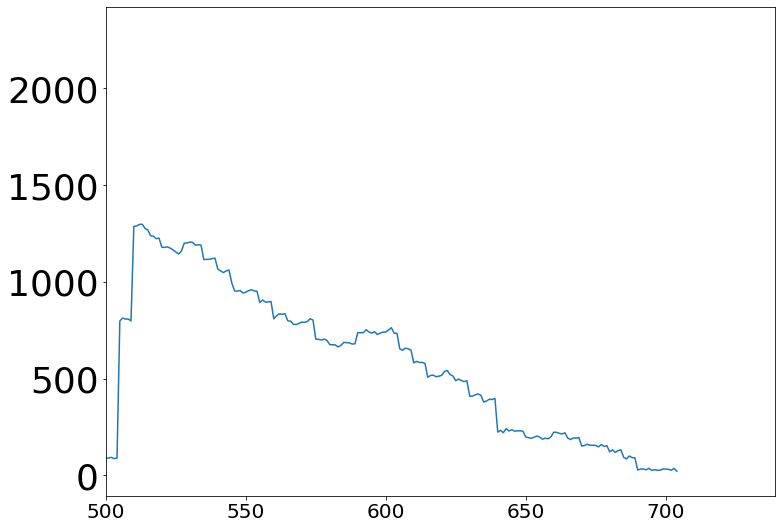

In [15]:
plt.plot(resp_z2)
plt.xlim(500)

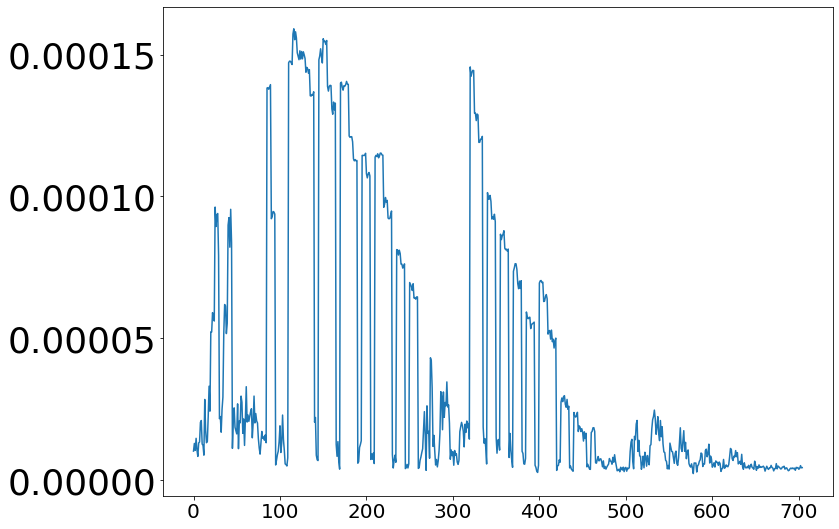

In [16]:
plt.plot(resp_x2)

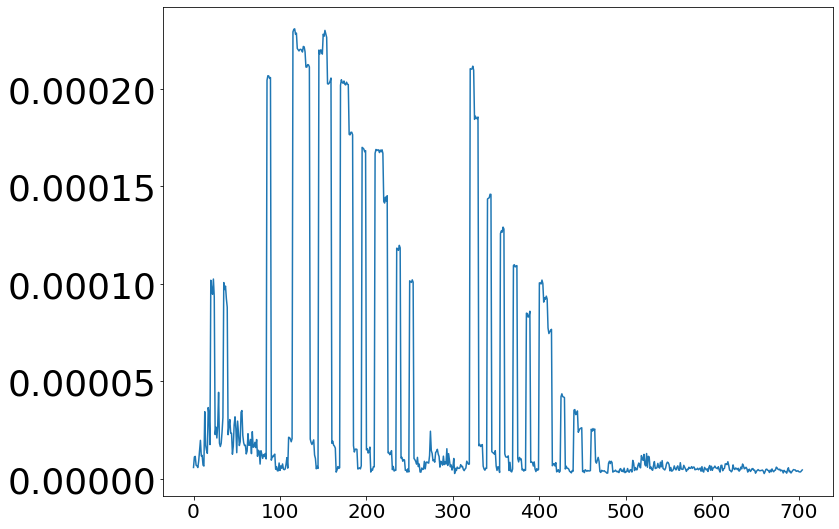

In [17]:
plt.plot(resp_y2)

In [18]:
bin_cont_z2, bin_cont_x2, bin_cont_y2 = [ [] for x in range(3)]
bin_unc_z2, bin_unc_x2, bin_unc_y2 = [ [] for x in range(3)]
for i in np.arange(0,len(resp_z2),5):
    bin_cont_z2.append(np.mean(resp_z2[i:i+5]))
    bin_unc_z2.append(np.std(resp_z2[i:i+5]))
    bin_cont_x2.append(np.mean(resp_x2[i:i+5]))
    bin_unc_x2.append(np.std(resp_x2[i:i+5]))
    bin_cont_y2.append(np.mean(resp_y2[i:i+5]))
    bin_unc_y2.append(np.std(resp_y2[i:i+5]))
    

In [23]:
diff_list2 = []
for i in np.arange(0,len(bin_cont_z2)-1,1):
    diff_list2.append(bin_cont_z2[i]-bin_cont_z2[i+1])

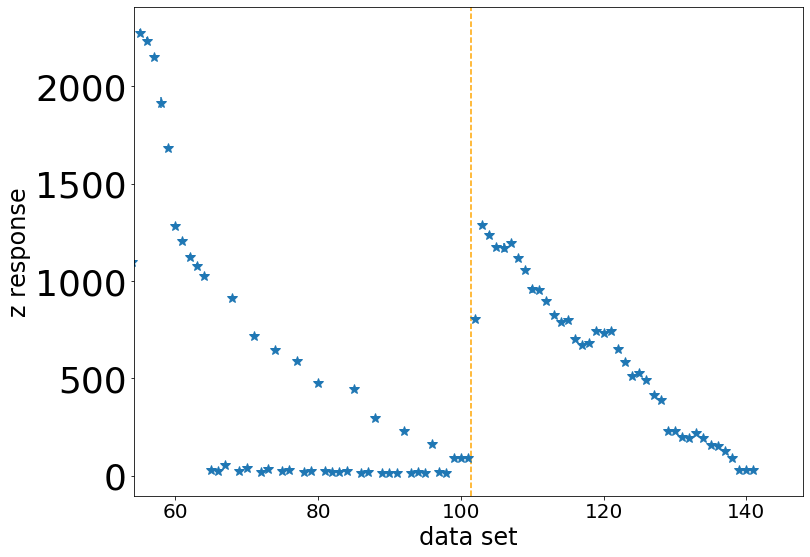

In [57]:
x = np.arange(1,(len(bin_cont_z2)+1),1)
#plt.errorbar(x,np.divide(bin_cont_z,45),np.divide(bin_unc_z,45),linestyle="",marker="*")
plt.errorbar(x,bin_cont_z2,bin_unc_z2,linestyle="",marker="*",markersize="10")
plt.xlim(54.2,)
plt.ylabel("z response")
plt.xlabel("data set")
plt.axvline(101.5,linestyle="dashed",label="recharged",color="orange")
#plt.axhline(25)
#plt.errorbar(x,bin_cont_x,bin_unc_x,linestyle="",marker="*")
#plt.errorbar(x,bin_cont_y,bin_unc_y,linestyle="",marker="*")
#plt.grid("True")
plt.savefig("Temporary_Plots/Discharge_Z_Pirrin_zoomin.png",dpi=300,bbox_inches="tight")


(-50, 110)

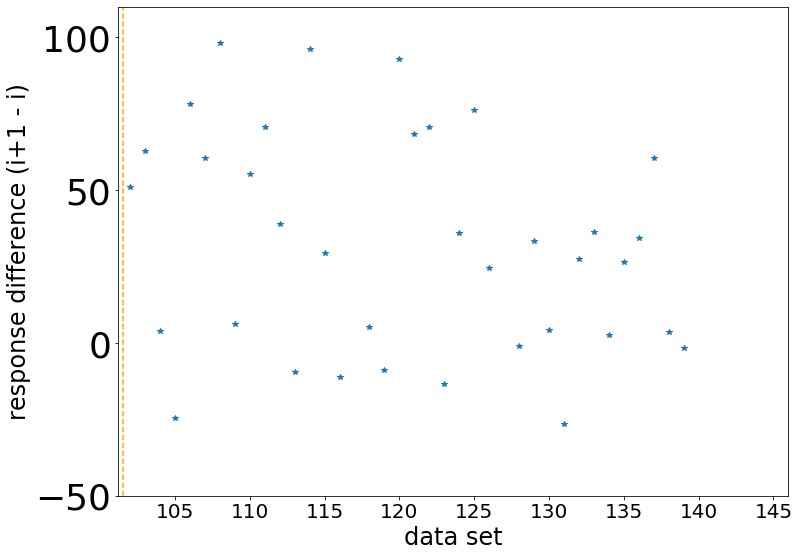

In [29]:
x2 = np.arange(44,len(diff_list)+44,1)
plt.plot(diff_list2, linestyle="",marker="*")
#plt.plot(x2,diff_list, linestyle="",marker="*")

plt.xlim(101.2,)
plt.axvline(101.5,linestyle="dashed",label="recharged",color="orange")
plt.ylabel("response difference (i+1 - i)")
plt.xlabel("data set")
plt.ylim(-50,110)
#plt.xlim(20,60)
#plt.ylim(-42,45)
#plt.xlim(100,55)


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 1., 1., 2., 0., 0., 0., 2., 1., 3., 2., 0., 0., 0., 0.,
        0., 0., 0., 0., 2., 1., 1., 0., 2., 2., 1., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 2., 1., 0., 0., 1., 2., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-58.11282445, -55.93724394, -53.76166343, -51.58608292,
        -49.41050241, -47.2349219 , -45.05934139, -42.88376088,
        -40.70818036, -38.53259985, -36.35701934, -34.18143883,
        -32.00585832, -29.83027781, -27.6546973 , -25.47911679,
        -23.30353628, -21.12795577, -18.95237526, -16.77679474,
        -14.60121423, -12.42563372, -10.25005321,  -8.0744727 ,
         -5.89889219,  -3.72331168,  -1.54773117,   0.62784934,
          2.80342985,   4.97901037,   7.15459088,   9.33017139,
         11.5057519 ,  13.68133241,  1

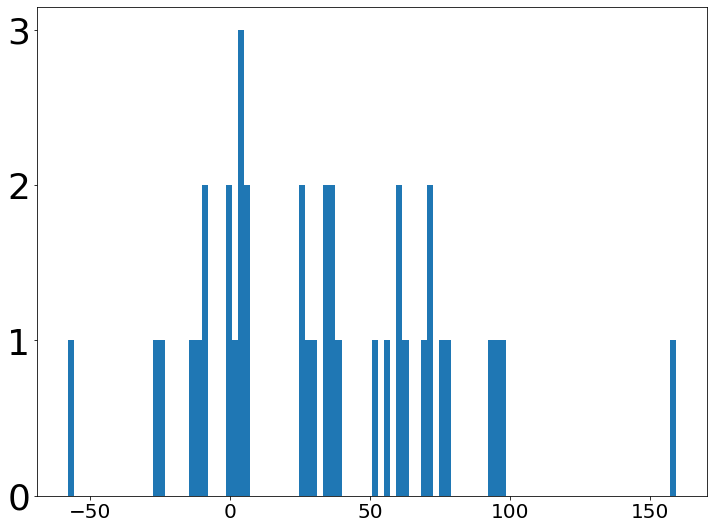

In [31]:
plt.hist(diff_list2[102:],bins=100)

In [33]:
foldername = r'/data/new_trap/20200311/Bead1/Discharge/'

resp_z3 = discharge_response(foldername=foldername,str_axis='z',drive_freq=71,max_file=1000)
resp_x3 = discharge_response(foldername=foldername,str_axis='x',drive_freq=71,max_file=1000)
resp_y3 = discharge_response(foldername=foldername,str_axis='y',drive_freq=71,max_file=1000)

299  files in folder
299  files loaded


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


299  files in folder
299  files loaded
299  files in folder
299  files loaded


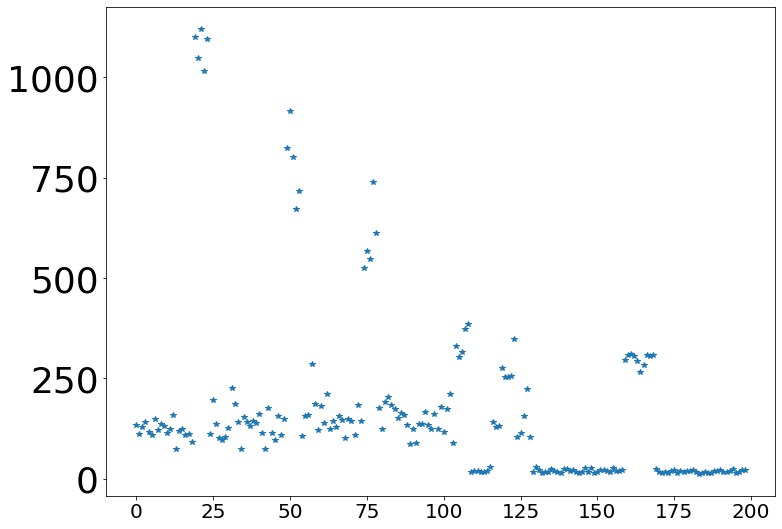

In [50]:
plt.plot(resp_z3[100:],marker="*",linestyle="")


In [34]:
foldername = r'/data/new_trap/20200306/Bead1/Discharge/'

resp_z4 = discharge_response(foldername=foldername,str_axis='z',drive_freq=71,max_file=1000)
resp_x4 = discharge_response(foldername=foldername,str_axis='x',drive_freq=71,max_file=1000)
resp_y4 = discharge_response(foldername=foldername,str_axis='y',drive_freq=71,max_file=1000)

382  files in folder
382  files loaded


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


382  files in folder
382  files loaded
382  files in folder
382  files loaded


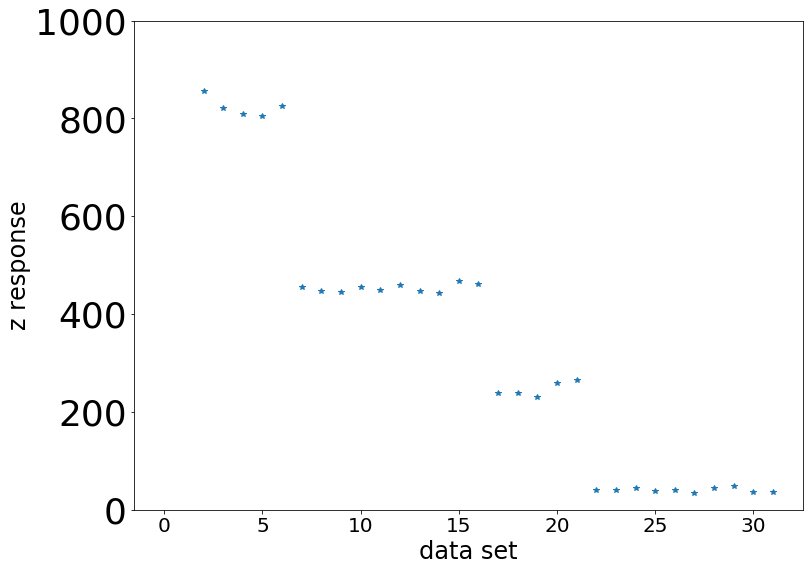

In [58]:
plt.plot(resp_z4[350:],marker="*",linestyle="")
plt.ylim(0,1000)
plt.ylabel("z response")
plt.xlabel("data set")
plt.savefig("Temporary_Plots/Discharge_Z_Siegbahn.png",dpi=300,bbox_inches="tight")


In [251]:
foldername = r'/data/new_trap/20200320/Bead1/Discharge/Recharge/'

resp_z5 = discharge_response(foldername=foldername,str_axis='z',drive_freq=71,max_file=1000)
#resp_x5 = discharge_response(foldername=foldername,str_axis='x',drive_freq=71,max_file=1000)
#resp_y5 = discharge_response(foldername=foldername,str_axis='y',drive_freq=71,max_file=1000)

665  files in folder
665  files loaded


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [252]:
bin_cont_z5, bin_cont_x5, bin_cont_y5 = [ [] for x in range(3)]
bin_unc_z5, bin_unc_x5, bin_unc_y5 = [ [] for x in range(3)]
for i in np.arange(0,len(resp_z5),5):
    bin_cont_z5.append(np.mean(resp_z5[i:i+5]))
    bin_unc_z5.append(np.std(resp_z5[i:i+5]))
    bin_cont_x5.append(np.mean(resp_x5[i:i+5]))
    bin_unc_x5.append(np.std(resp_x5[i:i+5]))
    bin_cont_y5.append(np.mean(resp_y5[i:i+5]))
    bin_unc_y5.append(np.std(resp_y5[i:i+5]))
    

/home/analysis_user/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/analysis_user/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/analysis_user/.local/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/analysis_user/.local/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/analysis_user/.local/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


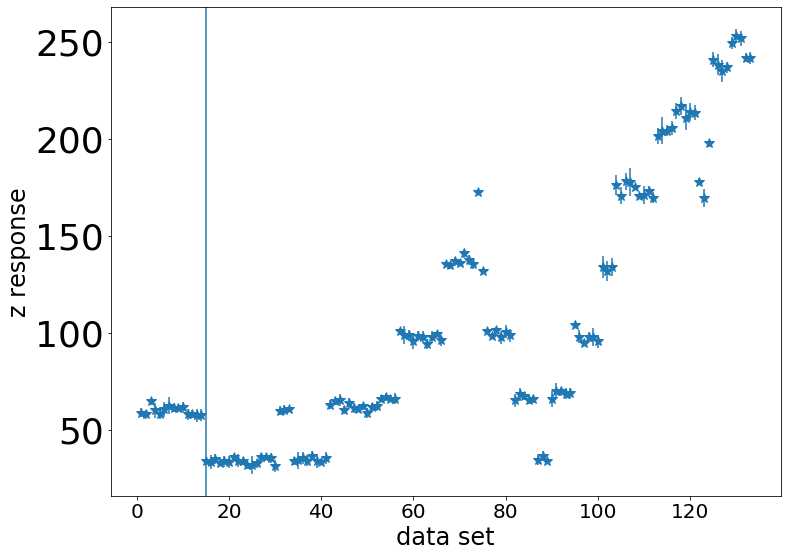

In [253]:
x = np.arange(1,(len(bin_cont_z5)+1),1)
#plt.errorbar(x,np.divide(bin_cont_z,45),np.divide(bin_unc_z,45),linestyle="",marker="*")
plt.errorbar(x,bin_cont_z5,bin_unc_z5,linestyle="",marker="*",markersize="10")
plt.ylabel("z response")
plt.xlabel("data set")
plt.axvline(15)
#plt.axhline(25)
#plt.errorbar(x,bin_cont_x,bin_unc_x,linestyle="",marker="*")
#plt.errorbar(x,bin_cont_y,bin_unc_y,linestyle="",marker="*")
#plt.grid("True")
#plt.savefig("Temporary_Plots/Discharge_Z_Pirrin_zoomin.png",dpi=300,bbox_inches="tight")
